In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import itertools as itr
from boundaries import WallBoundary, PressureBoundary, VelocityBoundary
from generators import WallGenerators
from simulation import Simulation

np.seterr(divide = None, invalid = None) # For suppressing warnings. Totally optional.
xResolution = 30
yResolution = 30
fluid = np.ones((xResolution, yResolution, 9))
boundary = WallBoundary(xResolution, yResolution, False)
boundary.borderWall()
generators = WallGenerators(boundary)

simulation = Simulation(xResolution, yResolution, fluid, boundary)

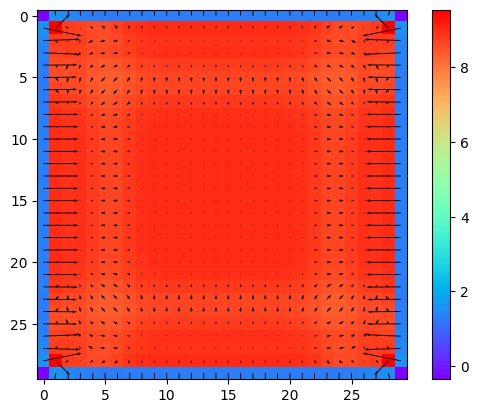

In [15]:
simulation.stepFluid()
plt.quiver(simulation.xIndex, simulation.yIndex, simulation.momentumX, simulation.momentumY)
plt.imshow(simulation.density, cmap = "rainbow", interpolation = "nearest")
plt.colorbar()